### Emulator

In [18]:
import xarray as xr
import numpy as np
i = 78
ds = xr.open_dataset(f"../data/{i}_QBO_20_40.nc",decode_times=False)
ds

<xarray.Dataset>
Dimensions:  (time: 6880, pfull: 40)
Coordinates:
  * time     (time) float64 3.961e+03 3.962e+03 ... 4.303e+03 4.304e+03
  * pfull    (pfull) float32 0.1782 0.5562 0.7238 0.9395 ... 821.4 902.2 970.5
Data variables:
    ucomp    (time, pfull) float32 ...

NameError: name 'i' is not defined

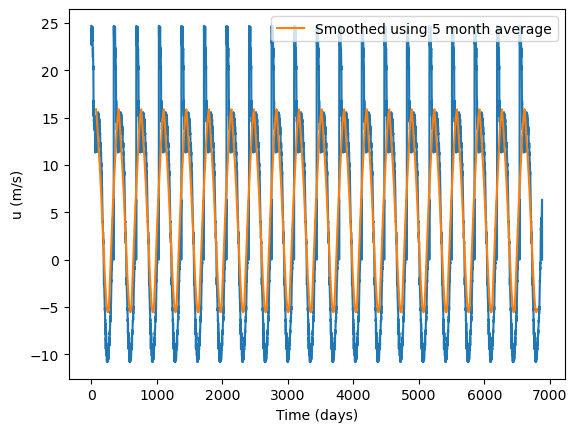

In [20]:
from scipy.signal import filtfilt,butter
import matplotlib.pyplot as plt
import numpy as np

def smoothed(signal,n=5):
    return np.convolve(signal,np.ones(n),mode='valid')/n

ref = ds.ucomp.sel(pfull=10,method='nearest')
x_smoothed = smoothed(ref.values,5*30)
plt.plot(ref.values)
t = np.arange(2.5*30,len(ref.values)-2.5*30 + 1)
plt.plot(t,x_smoothed,label="Smoothed using 5 month average")
plt.legend()
plt.ylabel("u (m/s)")
plt.xlabel("Time (days)")
plt.savefig(f"sample_qbo_{i}.png")


In [5]:
from scipy.interpolate import InterpolatedUnivariateSpline
interp = InterpolatedUnivariateSpline(t,x_smoothed)
roots = interp.roots()

In [35]:
roots

array([ 229.04774115,  437.21202448,  977.70491862, 1296.66613395,
       2402.02482771, 2587.71214809, 3112.74328686, 3223.44365642,
       3701.30911803, 3945.38801294, 5343.00081585, 5429.59498348,
       5676.38263755, 5765.79285825, 6727.865913  , 6875.22427938,
       7037.11218006])

In [36]:
periods = roots[2::2] - roots[:-2:2]

In [37]:
transitions = np.round(roots).astype(int)

In [38]:
transitions

array([ 229,  437,  978, 1297, 2402, 2588, 3113, 3223, 3701, 3945, 5343,
       5430, 5676, 5766, 6728, 6875, 7037])

In [39]:
amplitudes = []
for (start,stop) in zip(transitions[::2],transitions[2::2]):
    max = np.max(ref.values[start:stop])
    min = np.min(ref.values[start:stop])
    amplitudes.append((max-min)/2)

In [40]:
amplitudes

[15.203730583190918,
 17.09347915649414,
 12.05253791809082,
 10.972201347351074,
 11.699760437011719,
 7.209094524383545,
 11.774894714355469,
 11.730339050292969]

In [31]:
from scipy.fft import fft,fftfreq
fftsmoothed = fft(x_smoothed - np.mean(x_smoothed))
freqs = fftfreq(len(x_smoothed))
imax = np.argmax(np.abs(fftsmoothed))
dominant_period = 1/(30*freqs[imax])
dominant_period

23.503333333333334